# **Analyzing Financial Statements in Python**

## **The Cash Flow Statement**

In this chapter, you’ll analyze the cash flow statement and use its information to compute and interpret financial ratios. Using Seaborn to create informative plots that compare financial ratios across different companies, you'll build on your existing knowledge of Python and data visualization. By the end of this chapter, you'll have the skills to extract insights from cash flow statements using Python and handle messy, real-world data sets with missing data.

## **Compute net cash flow**


In the last video, you saw what cash outflows and inflows are. In this exercise, you'll put that knowledge to the test. You'll add and subtract transactions to the net income to compute net cash flow. The exercise has one transaction from each part of the cash flow statement: cash flow from operating, investing, and financing activities.

In [1]:
net_profit = 1000

decrease_in_accounts_recievable = 20

sale_of_property = 430

dividends_paid = 50

# Fill in the blanks
net_cash_flow = net_profit + decrease_in_accounts_recievable + sale_of_property - dividends_paid
print(net_cash_flow)

1400


## **Merging financial statements**


You just learned to read JSON data into Python and compute two ratios from the cash flow statement. Computing the cash flow to net income ratio and operating cash flow ratio not only needs information from a company's cash flow statement, but also the income statement and balance sheet.

In this exercise, you'll practice loading JSON data into Python using pandas and merging it with the income statement and balance sheet data.

pandas has already been loaded for you as pd. The datasets with balance sheet and income statement information are called balance_sheet and income_statement, respectively. These have also been loaded for you.

In [2]:
import pandas as pd

In [3]:
balance_sheet = pd.read_excel('balance_sheet.xlsx')

In [6]:
income_statement = pd.read_excel('financials.xlsx')

In [7]:
# Read cash flow data
cash_flow = pd.read_json("cash_flow_tech.json")

# Merge income statement data with balance sheet data
merged_income_statement_balance_sheet = pd.merge(income_statement, balance_sheet, on=["Year", "company"])

# Now merge it with cash flow data
merged_all = pd.merge(cash_flow, merged_income_statement_balance_sheet, on=["Year", "company"])

In [8]:
cash_flow.head()

,Year,Capital Expenditures,Change In Cash,Change To Account Receivables,Change To Inventory,Change To Liabilities,Change To Netincome,Change To Operating Activities,Depreciation,Dividends Paid,...,Net Income,Other Cashflows From Financing Activities,Other Cashflows From Investing Activities,Repurchase Of Stock,Total Cash From Financing Activities,Total Cash From Operating Activities,Total Cashflows From Investing Activities,comp_type,company,Effect Of Exchange Rate
0,2019,-10495000000,24311000000,245000000,-2.890000e+08,-2548000000,5076000000,-896000000,12547000000,-1.411900e+10,...,55256000000,-105000000.0,-1.078000e+09,-6.971400e+10,-90976000000,69391000000,45896000000,tech,AAPL,NaN
1,2020,-7309000000,-10435000000,6917000000,-1.270000e+08,-1981000000,6517000000,881000000,11056000000,-1.408100e+10,...,57411000000,754000000.0,-9.090000e+08,-7.599200e+10,-86820000000,80674000000,-4289000000,tech,AAPL,NaN
2,2021,-11085000000,-3860000000,-10125000000,-2.642000e+09,14002000000,2985000000,-6146000000,11284000000,-1.446700e+10,...,94680000000,976000000.0,-3.520000e+08,-9.252700e+10,-93353000000,104038000000,-14545000000,tech,AAPL,NaN
3,2022,-10708000000,-10952000000,-1823000000,1.484000e+09,9926000000,10044000000,-8387000000,11104000000,-1.484100e+10,...,99803000000,-160000000.0,-1.780000e+09,-9.562500e+10,-110749000000,122151000000,-22354000000,tech,AAPL,NaN
4,2019,-13925000000,-590000000,-2812000000,5.970000e+08,4694000000,-2521000000,-1542000000,11600000000,-1.381100e+10,...,39240000000,-675000000.0,-1.241000e+09,-1.954300e+10,-36887000000,52185000000,-15773000000,tech,MSFT,-115000000.0


In [9]:
merged_all.head()

,Year,Capital Expenditures,Change In Cash,Change To Account Receivables,Change To Inventory,Change To Liabilities,Change To Netincome,Change To Operating Activities,Depreciation,Dividends Paid,...,Total Current Liabilities,Total Liab,Total Stockholder Equity,comp_type_y,Deferred Long Term Asset Charges,Good Will,Intangible Assets,Capital Surplus,Minority Interest_y,Deferred Long Term Liab
0,2019,-10495000000,24311000000,245000000,-2.890000e+08,-2548000000,5076000000,-896000000,12547000000,-1.411900e+10,...,105718000000,248028000000,90488000000,tech,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,-7309000000,-10435000000,6917000000,-1.270000e+08,-1981000000,6517000000,881000000,11056000000,-1.408100e+10,...,105392000000,258549000000,65339000000,tech,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,-11085000000,-3860000000,-10125000000,-2.642000e+09,14002000000,2985000000,-6146000000,11284000000,-1.446700e+10,...,125481000000,287912000000,63090000000,tech,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,-10708000000,-10952000000,-1823000000,1.484000e+09,9926000000,10044000000,-8387000000,11104000000,-1.484100e+10,...,153982000000,302083000000,50672000000,tech,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,-13925000000,-590000000,-2812000000,5.970000e+08,4694000000,-2521000000,-1542000000,11600000000,-1.381100e+10,...,69420000000,184226000000,102330000000,tech,7.536000e+09,4.202600e+10,7.750000e+09,NaN,NaN,NaN


In [10]:
merged_all.columns

Index(['Year', 'Capital Expenditures', 'Change In Cash',
       'Change To Account Receivables', 'Change To Inventory',
       'Change To Liabilities', 'Change To Netincome',
       'Change To Operating Activities', 'Depreciation', 'Dividends Paid',
       'Investments', 'Issuance Of Stock', 'Net Borrowings', 'Net Income_x',
       'Other Cashflows From Financing Activities',
       'Other Cashflows From Investing Activities', 'Repurchase Of Stock',
       'Total Cash From Financing Activities',
       'Total Cash From Operating Activities',
       'Total Cashflows From Investing Activities', 'comp_type', 'company',
       'Effect Of Exchange Rate', 'Cost Of Revenue', 'Discontinued Operations',
       'Ebit', 'Effect Of Accounting Charges', 'Extraordinary Items',
       'Gross Profit', 'Income Before Tax', 'Income Tax Expense',
       'Interest Expense', 'Minority Interest_x', 'Net Income_y',
       'Net Income Applicable To Common Shares',
       'Net Income From Continuing Ops', 'Non

#### **Compute cash flow statement ratios**


In this exercise, you'll compute the operating cash flow ratio and cash flow to net income ratio.

Recall that the operating cash flow ratio tells us how many times a company can pay off its short-term obligations from the cash it generates from the core of its business.

The cash flow to net income ratio gives us an idea of the proportion of cash flows earned from operating activities.

The pandas DataFrame merged_dat has already been loaded for you. It contains information from the cash flow statement, income statement, and balance sheet. pandas has been loaded as pd.

In [17]:
merged_all["cash_flow_to_net_income"] = merged_all["Total Cash From Operating Activities"] / merged_all["Net Income_y"]
merged_all["operating_cash_flow"] = merged_all["Total Cash From Operating Activities"] / merged_all["Total Current Liabilities"]

# Compute the average ratios
average_ratios = merged_all.pivot_table(index="Year", values=["cash_flow_to_net_income","operating_cash_flow"])

average_ratios

,cash_flow_to_net_income,operating_cash_flow
Year,,
2018,1.978225,2.002246
2019,1.892268,1.092949
2020,1.763830,1.171911
2021,1.282083,1.235200
2022,1.223986,0.864842


#### **Imputing and filling in missing values using averages**


When you want to do your analysis, you will likely use your own data. Datasets often have some missing values. In this exercise, you'll practice imputing these missing values. Imputing missing values is important as you do not want missing values to be an obstacle in our analysis.

pandas has been loaded with the alias pd and NumPy has been loaded with the alias np. A pandas DataFrame called dataset has been loaded for you. It has the column "Total Current Liabilities", which has some missing values in it.

In [ ]:
impute_by_company = dataset.groupby("company")["Total Current Liabilities"].transform("mean")
impute_by_comp_type = dataset.groupby("comp_type")["Total Current Liabilities"].transform("mean")

# Fill in the missing values with imputation
dataset["current_liab_avg_comp"] = dataset["Total Current Liabilities"].fillna(impute_by_company)

# Fill in the missing values with imputation
dataset["current_liab_avg_comp_type"] = dataset["Total Current Liabilities"].fillna(impute_by_comp_type)

#### **Imputing missing values with percentiles**


In this exercise, you'll continue to practice imputing missing values. Unlike the previous exercise, however, you will use percentiles in place of averages to compute the imputations. Using percentiles is a great way to get conservative imputations. Imputing missing values in a column using percentiles involves the following underlying steps:

Remove the missing values from the column of interest.
Then compute the, say 70th percentile of the numbers from the column you just removed missing values from.
70th percentile worst value depends on the column you compute the percentile from:
For instance, having a large amount of assets is considered to be a good thing, so a low amount of assets is worse. The 70th percentile worst value of assets is actually just the 30th percentile of assets.
Analogously, high amounts of liabilities is considered bad. So a 70th worst value of liabilities is simply its 70th percentile.
pandas has been loaded with the alias pd and NumPy has been loaded with the alias np. A pandas DataFrame called dataset has been loaded for you. It has the column "Total Current Liabilities", which has some missing values.

In [ ]:
# Impute missing value with average non-missing values of company
impute_by_company = dataset.groupby("company")["Total Current Liabilities"].transform(lambda x: np.nanquantile(x, 0.7))

# Impute missing value with average non-missing values of industry
impute_by_comp_type = dataset.groupby("comp_type")["Total Current Liabilities"].transform(lambda x: np.nanquantile(x, 0.7))

# Fill in the missing values using imputation
dataset["current_liab_quant_comp"] = dataset["Total Current Liabilities"].fillna(impute_by_company)

# Fill in the missing values using imputation
dataset["current_liab_quant_comp_type"] = dataset["Total Current Liabilities"].fillna(impute_by_comp_type)

#### **Merging financial statements and filling missing values**


You just learned about cash flow to net income and operating cash flow ratio. Recall that net income is not entirely earned in cash, and the cash flow to net income ratio tells us the rate of net income earned in cash. The operating cash flow ratio tells us whether the company has enough cash to meet its short-term commitments.

In this exercise, you'll compute both of these ratios for Apple and Microsoft and then plot them. A side-by-side plot of ratios of companies in the same industry helps visualize their differences.

You will usually get only some of the necessary information from different financial statements in any one DataFrame. You will likely get it from different sources and have to merge them. In addition, data from the wild often has missing values. This exercise involves filling in NaNs and merging DataFrames.

A pandas DataFrame dataset has been loaded for you. It contains information about Microsoft and Apple's income statements and balance sheets. Another pandas DataFrame cash_flow_statement has also been loaded for you. This has some of Apple and Microsoft's cash flow information.

In [ ]:
# Merge dataset with cash_flow_statement
merged_dat = pd.merge(dataset, cash_flow_statement, on=["Year", "company"])

# Fill in the NaN values in Total Current Liabilities with the mean
merged_dat["Total Current Liabilities"] = merged_dat["Total Current Liabilities"].fillna(merged_dat["Total Current Liabilities"].mean())
cash_flow_statement
# Compute operating cash flow ratio
merged_dat["operating_cash_flow"] = merged_dat["Total Cash From Operating Activities"] / merged_dat["Total Current Liabilities"]

#### **Plotting cash flow ratios**


Sometimes, you might want to plot several line plots in one image. However, having too many lines in one plot will make it challenging to read. Making separate facets for every line is more elegant: the figure will look neat and more interpretable.

A pandas DataFrame plot_df has already been loaded for you. It has the columns "Year", "company","cash_flow_to_net_income" and "operating_cash_flow". Seaborn has been loaded with the alias sns.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
plot_df = merged_all[["Year", "company","cash_flow_to_net_income","operating_cash_flow"]]
plot_df

,Year,company,cash_flow_to_net_income,operating_cash_flow
0,2019,AAPL,1.255809,0.656378
1,2020,AAPL,1.405201,0.765466
2,2021,AAPL,1.098838,0.829114
3,2022,AAPL,1.223921,0.793281
4,2019,MSFT,1.329893,0.751729
5,2020,MSFT,1.370227,0.839096
6,2021,MSFT,1.252469,0.865583
7,2022,MSFT,1.224051,0.936402
8,2018,GOOG,1.560743,1.385644
9,2019,GOOG,1.587514,1.205635


In [25]:
# Melt the DataFrame to prepare for plotting
melt_data = plot_df.melt(id_vars=["Year","company"], var_name="Ratio")
melt_data

,Year,company,Ratio,value
0,2019,AAPL,cash_flow_to_net_income,1.255809
1,2020,AAPL,cash_flow_to_net_income,1.405201
2,2021,AAPL,cash_flow_to_net_income,1.098838
3,2022,AAPL,cash_flow_to_net_income,1.223921
4,2019,MSFT,cash_flow_to_net_income,1.329893
5,2020,MSFT,cash_flow_to_net_income,1.370227
6,2021,MSFT,cash_flow_to_net_income,1.252469
7,2022,MSFT,cash_flow_to_net_income,1.224051
8,2018,GOOG,cash_flow_to_net_income,1.560743
9,2019,GOOG,cash_flow_to_net_income,1.587514


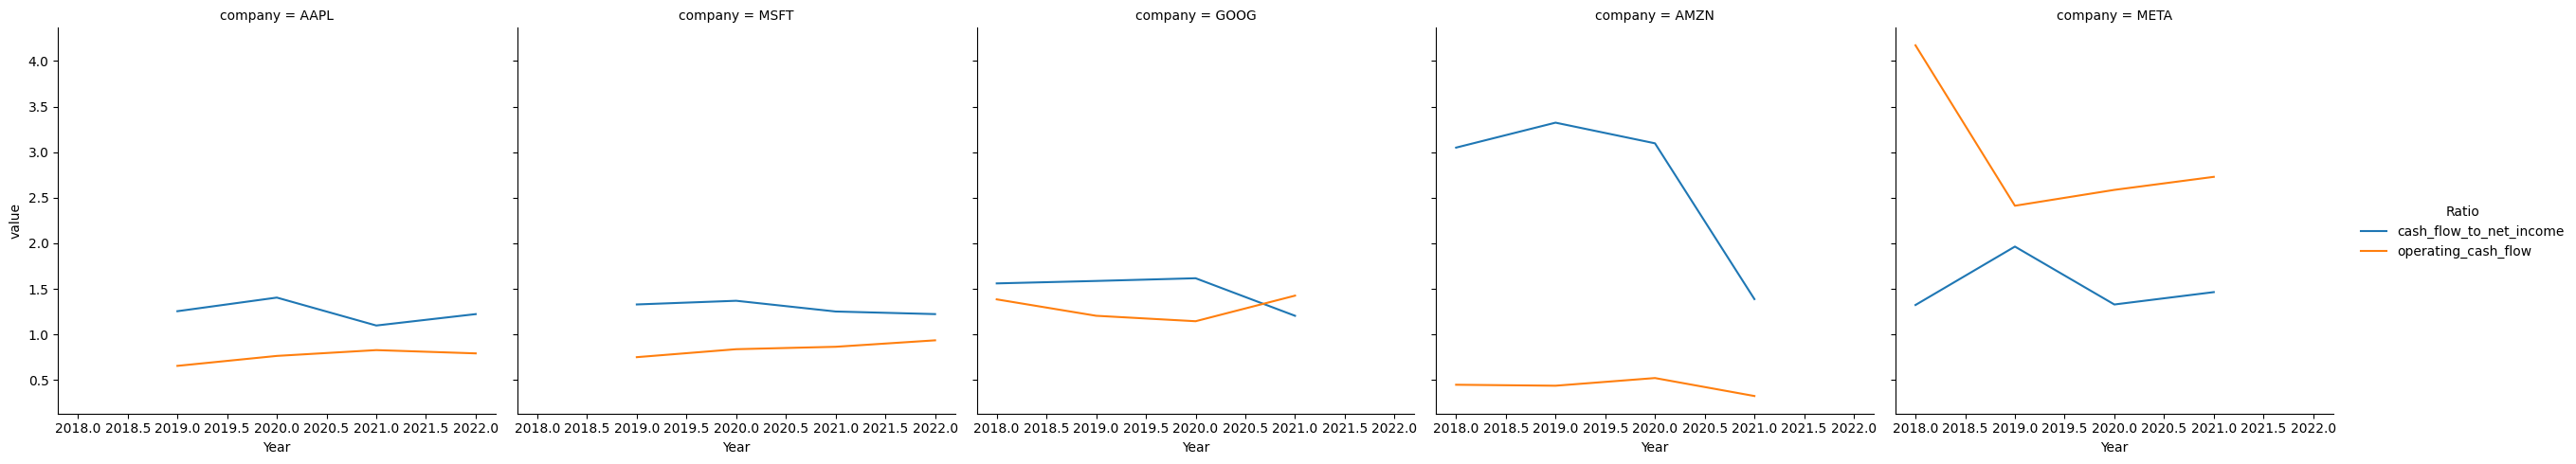

In [26]:
# Plot your melted DataFrame
sns.relplot(data=melt_data, x="Year", y="value", col="company", kind="line", hue="Ratio")

plt.show()

##**Profitability metrics**

In this chapter, you'll learn about the different financial ratios that measure a company's profitability, how to compute them, and how to compare them across other companies. You'll build upon your knowledge of the Seaborn library to create visualizations that help you analyze profitability ratios and identify trends.

#### **Using margins in pivot tables and making a bar plot**


You just learned the margins functionality of pivot_table().

Setting margins = True while using pivot_table() returns the aggfunc of the whole value, i.e., is the aggfunc of the value not conditioned on its index.

In this exercise, you will practice what you've learned. You will make a plot where you prepare the data using pivot_table() and also make use of the margins functionality.

A pandas DataFrame called dataset has been loaded for you. pandas and Seaborn have been loaded with the aliases pd and sns respectively.

In [30]:
dataset = pd.merge(balance_sheet, income_statement, on=["Year", "company"])

# Compute debt-to-equity ratio
dataset["debt_to_equity"] = dataset["Total Liab"]/dataset["Total Stockholder Equity"]
dataset

,Year,Accounts Payable,Cash,Common Stock,Gains Losses Not Affecting Retained Earnings,Inventory,Long Term Debt,Long Term Investments,Net Receivables,Net Tangible Assets,...,Operating Income,Other Items,Other Operating Expenses,Research Development,Selling General Administrative,Total Operating Expenses,Total Other Income Expense Net,Total Revenue,comp_type_y,debt_to_equity
0,2019,46236000000,48844000000,4.517400e+10,-584000000,4.106000e+09,9.180700e+10,1.053410e+11,45804000000,90488000000,...,63930000000,NaN,NaN,1.621700e+10,18245000000,196244000000,1807000000,260174000000,tech,2.741004
1,2020,42296000000,38016000000,5.077900e+10,-406000000,4.061000e+09,9.866700e+10,1.008870e+11,37445000000,65339000000,...,66288000000,NaN,NaN,1.875200e+10,19916000000,208227000000,803000000,274515000000,tech,3.957039
2,2021,54763000000,34940000000,5.736500e+10,163000000,6.580000e+09,1.091060e+11,1.278770e+11,51506000000,63090000000,...,108949000000,NaN,NaN,2.191400e+10,21973000000,256868000000,258000000,365817000000,tech,4.563512
3,2022,64115000000,23646000000,6.484900e+10,-11109000000,4.946000e+09,9.895900e+10,1.208050e+11,60932000000,50672000000,...,119437000000,NaN,NaN,2.625100e+10,25094000000,274891000000,-334000000,394328000000,tech,5.961537
4,2019,9382000000,11356000000,7.852000e+10,-340000000,2.063000e+09,6.666200e+10,2.649000e+09,29524000000,52554000000,...,42959000000,NaN,NaN,1.687600e+10,23098000000,82884000000,729000000,125843000000,tech,1.800313
5,2020,12530000000,13576000000,8.055200e+10,3186000000,1.895000e+09,5.957800e+10,2.965000e+09,32011000000,67915000000,...,52959000000,NaN,NaN,1.926900e+10,24709000000,90056000000,77000000,143015000000,tech,1.546921
6,2021,15163000000,14224000000,8.311100e+10,1822000000,2.636000e+09,5.007400e+10,5.984000e+09,38043000000,84477000000,...,69916000000,NaN,NaN,2.071600e+10,25224000000,98172000000,1186000000,168088000000,tech,1.350755
7,2022,19000000000,13931000000,8.693900e+10,-4678000000,3.742000e+09,4.703200e+10,6.891000e+09,44261000000,87720000000,...,83383000000,NaN,NaN,2.451200e+10,27725000000,114887000000,333000000,198270000000,tech,1.190679
8,2018,4378000000,16701000000,4.504900e+10,-2306000000,1.107000e+09,3.950000e+09,1.385900e+10,21193000000,157520000000,...,32595000000,NaN,NaN,2.141900e+10,23256000000,104224000000,2318000000,136819000000,tech,0.310559
9,2019,5561000000,18498000000,5.055200e+10,-1232000000,9.990000e+08,3.958000e+09,1.307800e+10,27492000000,178839000000,...,35928000000,NaN,NaN,2.601800e+10,28015000000,125929000000,3697000000,161857000000,tech,0.369670


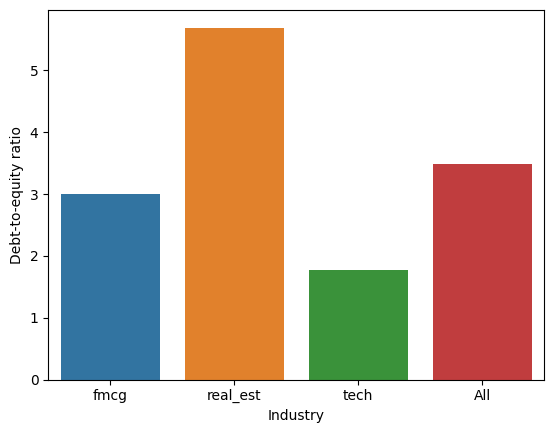

In [33]:
# Use pivot table to compute average debt-to-equity ratios
pivot_data = dataset.pivot_table(index = "comp_type_y", values = "debt_to_equity", margins=True)

# Make the bar plot
sns.barplot(data=pivot_data.reset_index(), x="comp_type_y", y="debt_to_equity")
plt.xlabel("Industry")
plt.ylabel("Debt-to-equity ratio")
plt.show()
plt.close()

#### **Preparing data for a facet grid plot**

In the next exercise, you'll practice making the plot. This is a neat plot to observe:

The gross margin of tech companies is more spread out than those of FMCG companies
Year by year, how profitable a company is compared to the average company in its industry.
pandas is loaded with the alias pd and seaborn is loaded with the alias sns. A pandas DataFrame dataset is loaded for you which already has a gross_margin column computed.

In [39]:
import numpy as np

dataset["gross_margin"] = ( dataset["Total Revenue"] - dataset["Cost Of Revenue"] ) / dataset["Total Revenue"]

# Subset tech and fmcg companies
subset_dat = dataset.loc[dataset["comp_type_y"].isin(["tech", "fmcg"])]

# Compute yearly average gross margin ratio of tech and fmcg companies
subset_dat_avg = subset_dat.pivot_table(index=["Year", "comp_type_y"], values = "gross_margin").reset_index()

# Add company column
subset_dat_avg["company"] = np.where(subset_dat_avg["comp_type_y"]=="tech", "Avg tech", "Avg fmcg")
                         
# Concatenate the DataFrames
plot_df = pd.concat([subset_dat, subset_dat_avg], axis=0)

In [40]:
plot_df

,Year,Accounts Payable,Cash,Common Stock,Gains Losses Not Affecting Retained Earnings,Inventory,Long Term Debt,Long Term Investments,Net Receivables,Net Tangible Assets,...,Other Items,Other Operating Expenses,Research Development,Selling General Administrative,Total Operating Expenses,Total Other Income Expense Net,Total Revenue,comp_type_y,debt_to_equity,gross_margin
0,2019,4.623600e+10,4.884400e+10,4.517400e+10,-5.840000e+08,4.106000e+09,9.180700e+10,1.053410e+11,4.580400e+10,9.048800e+10,...,NaN,NaN,1.621700e+10,1.824500e+10,1.962440e+11,1.807000e+09,2.601740e+11,tech,2.741004,0.378178
1,2020,4.229600e+10,3.801600e+10,5.077900e+10,-4.060000e+08,4.061000e+09,9.866700e+10,1.008870e+11,3.744500e+10,6.533900e+10,...,NaN,NaN,1.875200e+10,1.991600e+10,2.082270e+11,8.030000e+08,2.745150e+11,tech,3.957039,0.382332
2,2021,5.476300e+10,3.494000e+10,5.736500e+10,1.630000e+08,6.580000e+09,1.091060e+11,1.278770e+11,5.150600e+10,6.309000e+10,...,NaN,NaN,2.191400e+10,2.197300e+10,2.568680e+11,2.580000e+08,3.658170e+11,tech,4.563512,0.417794
3,2022,6.411500e+10,2.364600e+10,6.484900e+10,-1.110900e+10,4.946000e+09,9.895900e+10,1.208050e+11,6.093200e+10,5.067200e+10,...,NaN,NaN,2.625100e+10,2.509400e+10,2.748910e+11,-3.340000e+08,3.943280e+11,tech,5.961537,0.433096
4,2019,9.382000e+09,1.135600e+10,7.852000e+10,-3.400000e+08,2.063000e+09,6.666200e+10,2.649000e+09,2.952400e+10,5.255400e+10,...,NaN,NaN,1.687600e+10,2.309800e+10,8.288400e+10,7.290000e+08,1.258430e+11,tech,1.800313,0.659020
5,2020,1.253000e+10,1.357600e+10,8.055200e+10,3.186000e+09,1.895000e+09,5.957800e+10,2.965000e+09,3.201100e+10,6.791500e+10,...,NaN,NaN,1.926900e+10,2.470900e+10,9.005600e+10,7.700000e+07,1.430150e+11,tech,1.546921,0.677810
6,2021,1.516300e+10,1.422400e+10,8.311100e+10,1.822000e+09,2.636000e+09,5.007400e+10,5.984000e+09,3.804300e+10,8.447700e+10,...,NaN,NaN,2.071600e+10,2.522400e+10,9.817200e+10,1.186000e+09,1.680880e+11,tech,1.350755,0.689258
7,2022,1.900000e+10,1.393100e+10,8.693900e+10,-4.678000e+09,3.742000e+09,4.703200e+10,6.891000e+09,4.426100e+10,8.772000e+10,...,NaN,NaN,2.451200e+10,2.772500e+10,1.148870e+11,3.330000e+08,1.982700e+11,tech,1.190679,0.684017
8,2018,4.378000e+09,1.670100e+10,4.504900e+10,-2.306000e+09,1.107000e+09,3.950000e+09,1.385900e+10,2.119300e+10,1.575200e+11,...,NaN,NaN,2.141900e+10,2.325600e+10,1.042240e+11,2.318000e+09,1.368190e+11,tech,0.310559,0.564761
9,2019,5.561000e+09,1.849800e+10,5.055200e+10,-1.232000e+09,9.990000e+08,3.958000e+09,1.307800e+10,2.749200e+10,1.788390e+11,...,NaN,NaN,2.601800e+10,2.801500e+10,1.259290e+11,3.697000e+09,1.618570e+11,tech,0.369670,0.555805


Now it's time to make the plot.

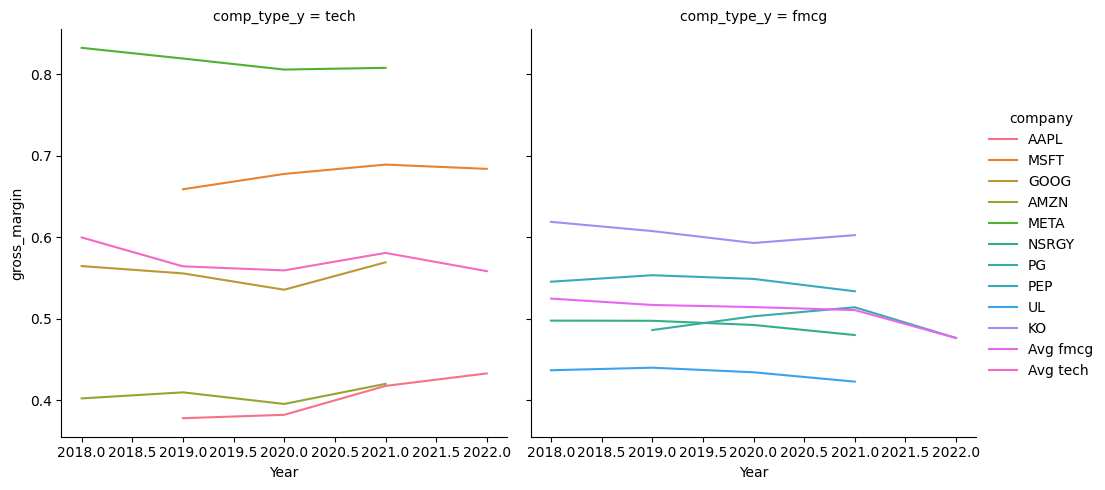

In [43]:
# Make the plot
sns.relplot(data=plot_df.reset_index(drop=True), x="Year", y="gross_margin", kind="line", hue="company", col="comp_type_y")
plt.show()
plt.close()

#### **User-defined function to make plots**


In the last exercise, you had to write this code to make the plot:
```
# Subset tech and fmcg companies
subset_dat = dataset.loc[dataset["comp_type"].isin(["tech", "fmcg"])]

# Compute yearly average gross margin ratio of tech and fmcg companies
subset_dat_avg = subset_dat.pivot_table(index=["Year", "comp_type"], values = "gross_margin").reset_index()

# Add column company
subset_dat_avg["company"] = np.where(subset_dat_avg["comp_type"]=="tech", "Avg tech", "Avg fmcg")

# Concat the DataFrames
plot_df = pd.concat([subset_dat, subset_dat_avg], axis=0)

# Make the plot
sns.relplot(data=plot_df.reset_index(drop=True), x="Year", y="gross_margin", hue="company", col="comp_type", kind="line")
plt.show()
plt.close()
```
Notice that we perform the same actions on the tech and FMCG DataFrames in this exercise. This is repetitive and goes against a coding principle called DRY - Don't repeat yourself. Repetitive code is bad since it increases your work and makes your code more prone to mistakes. In this exercise, you will define your function to process data and plot figures.

**Question**

Look at this function - this function can make the same plot that you did in the last exercise but with the repetitiveness stripped out.
```
def make_plot(dataset, ratio, comp_type):
  whole_dat = []
  for industry in comp_type:
    dat = dataset.loc[dataset["comp_type"]==industry]
    dat_avg = dat.pivot_table(index="Year", values=ratio).reset_index()
    dat_avg["company"], dat_avg["comp_type"] = f"Avg {type}", industry"
    whole_dat.append(pd.concat([dat, dat_avg]))

  plot_df = pd.concat(whole_dat).reset_index(drop=True)
  sns.relplot(data=plot_df, x="Year", y="gross_margin", hue="company", col="comp_type", kind="line")
  plt.show()
  plt.close()
  ```
This function uses an f-string, with f"Avg {industry}". This f-string will return Avgand the value of industry as an output. Also notice a drop=True in reset_index(). This will reset the index of the DataFrame but not add the old index as a column.

How many comp_types can this function take? The function is loaded in the console for you to test it. The pandas DataFrame dataset is also available with gross margin computed.

**Answer:** The function can take as many “comp_type” as the user wants in the account. However, it must be passed as a list where the entries are the types of companies.

In [49]:
def make_plot(dataset, ratio, comp_type):
  whole_dat = []
  for type in comp_type:
    dat = dataset.loc[dataset["comp_type_y"]==type]
    dat_avg = dat.pivot_table(index="Year", values=ratio).reset_index()
    dat_avg["company"], dat_avg["comp_type_y"] = f"Avg {type}", type
    whole_dat.append(pd.concat([dat, dat_avg]))

  plot_df = pd.concat(whole_dat).reset_index(drop=True)
  sns.relplot(data=plot_df, x="Year", y="gross_margin", hue="company", col="comp_type_y", kind="line")
  plt.show()
  plt.close()

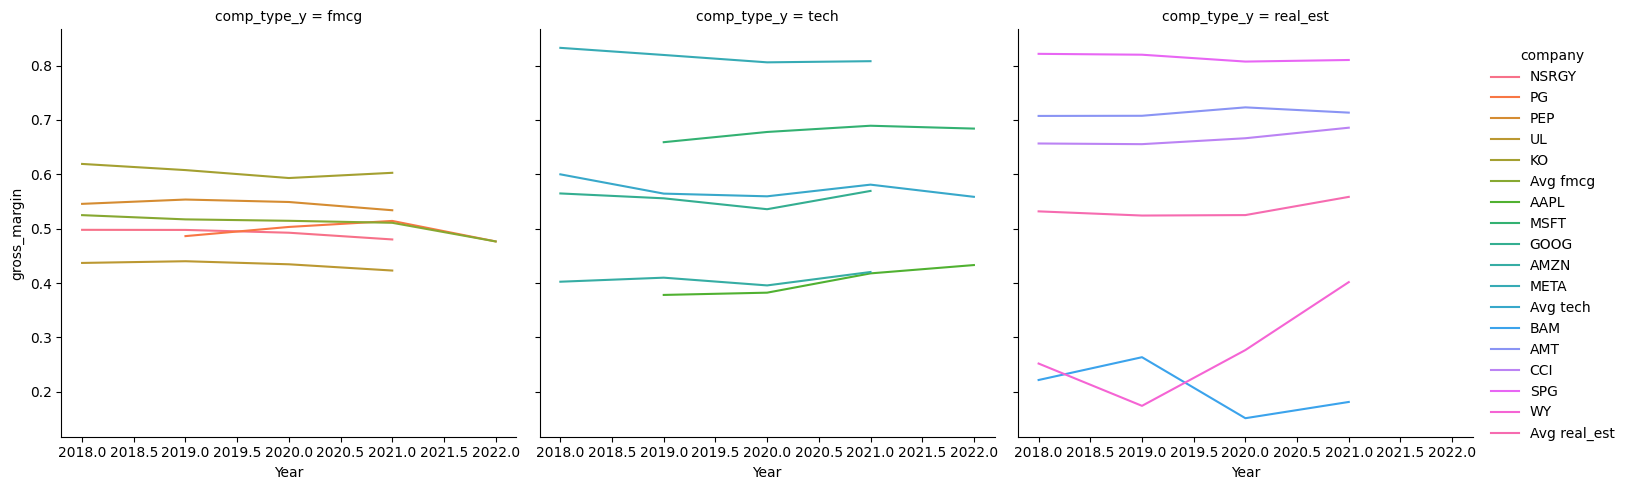

In [51]:
# Plot the gross margin ratio
make_plot(dataset, "gross_margin", ['fmcg', 'tech', 'real_est'])

#### **Relationship between operating margin and debt-to-equity for real estate companies**


Scatter plots are a great way of seeing the relationship between two variables. In this exercise, you'll practice computing the operating margin and debt-to-equity ratio. You'll then make a scatter plot to see if there is any relationship between the operating margin and debt-to-equity ratio for real estate companies.

pandas ans Seaborn have been loaded with the alias pd and sns, respectively. You can use the pandas DataFrame dataset to compute the ratios. The console will have the columns of dataset printed so you see which columns to use to compute the ratios.

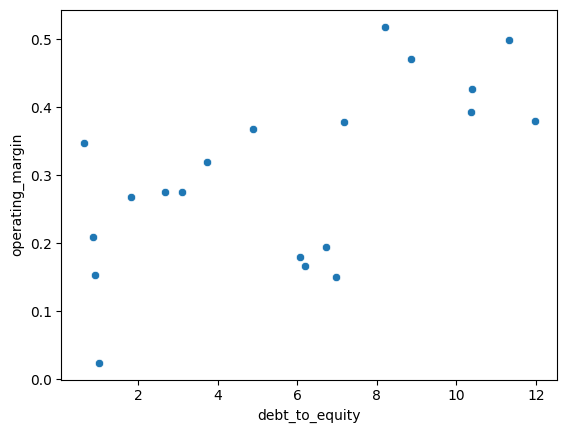

In [53]:
# Compute the operating margin
dataset["operating_margin"] = (dataset["Total Revenue"] - dataset["Total Operating Expenses"])/dataset["Total Revenue"]

# Compute debt-to-equity
dataset["debt_to_equity"] = dataset["Total Liab"]/dataset["Total Stockholder Equity"]

# Subset the fmcg companies
dataset_real_est = dataset.loc[dataset["comp_type_y"]=="real_est"]

# Make the plot
sns.scatterplot(data=dataset_real_est, x="debt_to_equity", y="operating_margin")
plt.show()
plt.close()

#### **Practice with sns.regplot()**


In this exercise, you will check for any relationship between the operating margin and debt-to-equity ratio for all the companies in our dataset. You will first make a scatter plot to analyze the relationship and will be able to discern a relatively clear positive relationship between the debt-to-equity ratio and operating margin. Then you will use sns.regplot to get a line of best fit to confirm or reject the hypothesis that there is a positive relationship between the two ratios.

The pandas DataFrame dataset is loaded with debt-to-equity and operating margin ratio already computed. pandas and seaborn is loaded with alias pd and sns respectively.

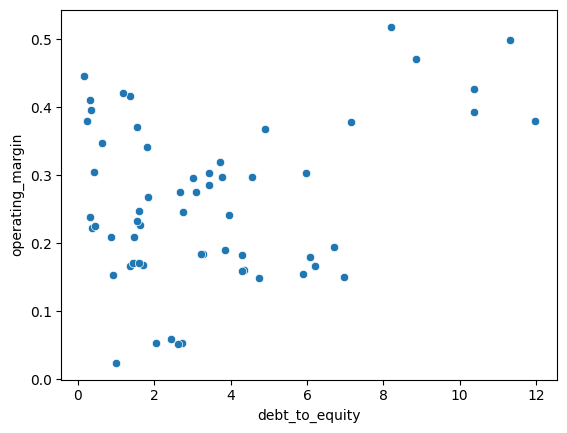

In [54]:
# Make the scatterplot
sns.scatterplot(data=dataset, x="debt_to_equity", y = "operating_margin")
plt.show()
plt.close()

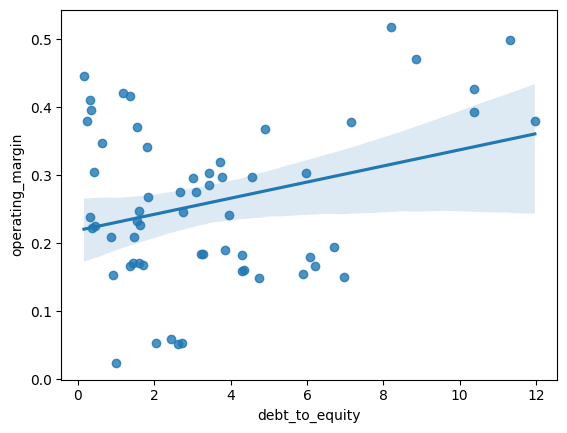

In [55]:
# Make the reg plot
sns.regplot(data=dataset, x="debt_to_equity", y = "operating_margin")
plt.show()
plt.close()

#### **Updating the user-defined function for plotting**


Recall the function to make plots from an earlier exercise:
```
def make_plot(dataset, ratio, comp_type):
  whole_dat = []
  for industry in comp_type:
    dat = dataset.loc[dataset["comp_type"]==industry]
    dat_avg = dat.pivot_table(index="Year",
                              values=ratio).reset_index()
    dat_avg["company"] = f"Avg {type}"
    dat_avg["comp_type"] = industry
    whole_dat.append(pd.concat([dat,
                                dat_avg]))

  plot_df = pd.concat(whole_dat).reset_index(drop=True)
  sns.relplot(data=plot_df,
              x="Year",
              y="gross_margin",
              hue="company",
              col="comp_type",
              kind="line")
  plt.show()
  plt.close()
  ```
Notice how this function can only make line plots with year on the x-axis. In this exercise, you will be introduced to an updated version of this function.

**Question**

The function has been updated like this:
```
def make_plot_updated(dataset, x, y, kind, comp_type):
  whole_dat = []
  for industry in comp_type:
    dat = dataset.loc[dataset["comp_type"]==industry]
    values = [x,y if y!="Year" else x]
    dat_avg = dat.pivot_table(index="Year",
                              values=values).reset_index()
    dat_avg = dat_avg.loc[:,
                          ~dat_avg.columns.duplicated()]
    dat_avg["company"] = f"Avg {type}"
    dat_avg["comp_type"] = industry
    whole_dat.append(pd.concat([dat, dat_avg]))

  plot_df = pd.concat(whole_dat).reset_index(drop=True)
  sns.relplot(data=plot_df,
              x=x,
              y=y,
              hue="company",
              col="comp_type",
              kind=kind)
  plt.show()
  plt.close()
  ```
In the code above, whole_dat is a list, and the command .append(x) essentially affixes x to the list it is applied to, which in this case is whole_dat.

Choose the correct option below. The function is loaded in the console for you to test it. The pandas DataFrame dataset is also available with operating margin and debt-to-equity ratio computed.

**Answer:** This function can be used to make line plots and scatter plots

**Question**

The function has been updated like this:
```
def make_plot_updated(dataset, x, y, kind, comp_type):
  whole_dat = []
  for industry in comp_type:
    dat = dataset.loc[dataset["comp_type"]==industry]
    values = [x,y if y!="Year" else x]
    dat_avg = dat.pivot_table(index="Year",
                              values=values).reset_index()
    dat_avg = dat_avg.loc[:,
                          ~dat_avg.columns.duplicated()]
    dat_avg["company"] = f"Avg {type}"
    dat_avg["comp_type"] = industry
    whole_dat.append(pd.concat([dat, dat_avg]))

  plot_df = pd.concat(whole_dat).reset_index(drop=True)
  sns.relplot(data=plot_df,
              x=x, y=y,
              hue="company",
              col="comp_type",
              kind=kind)
  plt.show()
  plt.close()
  ```
What is the purpose of (1) values = [x,y if y!="Year" else x], and (2) dat_avg = dat_avg.loc[:,~dat_avg.columns.duplicated()]?

You can paste the following code in the console and have a look at the output to figure it out. ~ negates the object it is attached to. So ~x means not x.
```
dat = dataset.loc[dataset["comp_type"]=="fmcg"]

x,y = "operating_margin", "Year"
values = [x,y if y!="Year" else x]
dat_avg = dat.pivot_table(index="Year", values=values).reset_index()
print(dat_avg)
print(dat_avg.columns.duplicated())
dat_avg = dat_avg.loc[:,~dat_avg.columns.duplicated()]
print(values)
print(dat_avg)


x,y = "operating_margin", "debt_to_equity"
values = [x,y if y!="Year" else x]
dat_avg = dat.pivot_table(index="Year", values=values).reset_index()
print(dat_avg)
print(dat_avg.columns.duplicated())
dat_avg = dat_avg.loc[:,~dat_avg.columns.duplicated()]
print(values)
print(dat_avg)
```

**Answer:** (1)	Takes out “Year: from y argument, if y=”Year” and (2) drops duplicate columns from df_avg

In [56]:
def make_plot_updated(dataset, x, y, kind, comp_type):
  whole_dat = []
  for industry in comp_type:
    dat = dataset.loc[dataset["comp_type_y"]==industry]
    values = [x,y if y!="Year" else x]
    dat_avg = dat.pivot_table(index="Year",
                              values=values).reset_index()
    dat_avg = dat_avg.loc[:,
                          ~dat_avg.columns.duplicated()]
    dat_avg["company"] = f"Avg {type}"
    dat_avg["comp_type_y"] = industry
    whole_dat.append(pd.concat([dat, dat_avg]))

  plot_df = pd.concat(whole_dat).reset_index(drop=True)
  sns.relplot(data=plot_df,
              x=x, y=y,
              hue="company",
              col="comp_type_y",
              kind=kind)
  plt.show()
  plt.close()

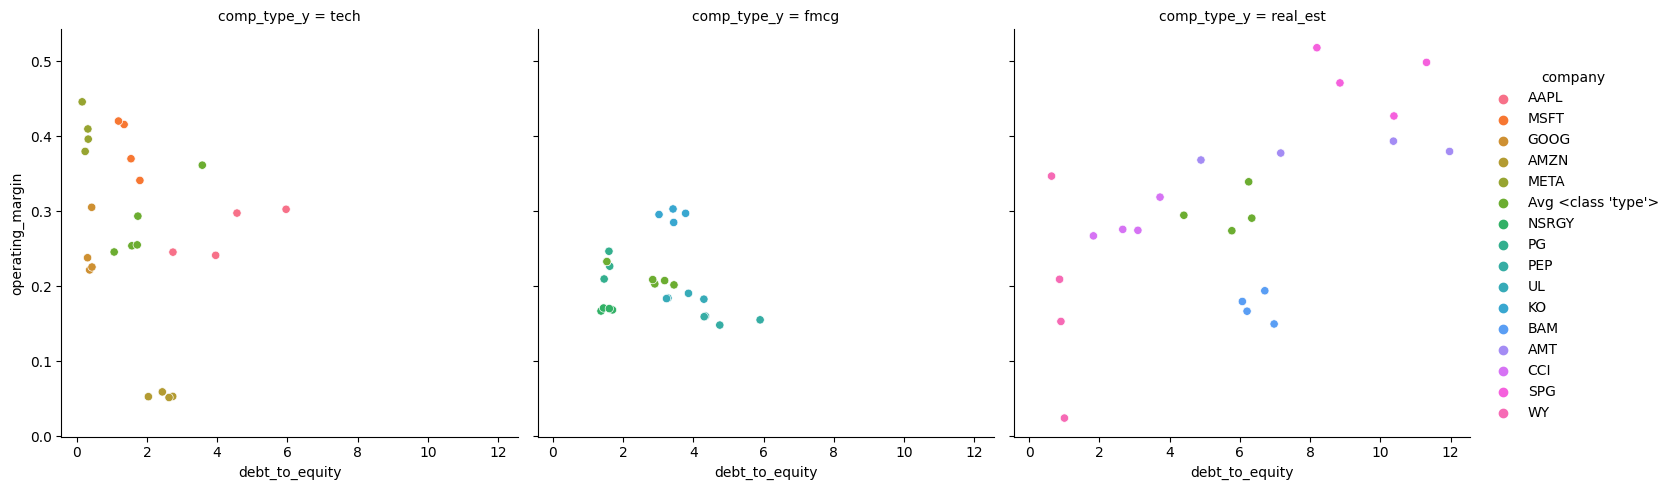

In [57]:
make_plot_updated(dataset=dataset, x="debt_to_equity", y="operating_margin",kind="scatter", comp_type=["tech","fmcg","real_est"])

#### **Practice making heat maps**


Heat maps are a great way to visualize correlations between various financial ratios. They can be used to see which ratios correlate strongly with profitability ratios and thus aid us in deciding which companies to invest in.

In this exercise, you'll practice making heat maps. A pandas DataFrame merged_dat has been loaded for you with some ratios already computed. pandas and Seaborn have been loaded with the aliases pd and sns.

In [61]:
dataset.columns

Index(['Year', 'Accounts Payable', 'Cash', 'Common Stock',
       'Gains Losses Not Affecting Retained Earnings', 'Inventory',
       'Long Term Debt', 'Long Term Investments', 'Net Receivables',
       'Net Tangible Assets', 'Other Assets', 'Other Current Assets',
       'Other Current Liab', 'Other Liab', 'Other Stockholder Equity',
       'Property Plant Equipment', 'Retained Earnings', 'Short Long Term Debt',
       'Short Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Liab', 'Total Stockholder Equity',
       'comp_type_x', 'company', 'Deferred Long Term Asset Charges',
       'Good Will', 'Intangible Assets', 'Capital Surplus',
       'Minority Interest_x', 'Deferred Long Term Liab', 'Cost Of Revenue',
       'Discontinued Operations', 'Ebit', 'Effect Of Accounting Charges',
       'Extraordinary Items', 'Gross Profit', 'Income Before Tax',
       'Income Tax Expense', 'Interest Expense', 'Minority Interest_y',
       'Net In

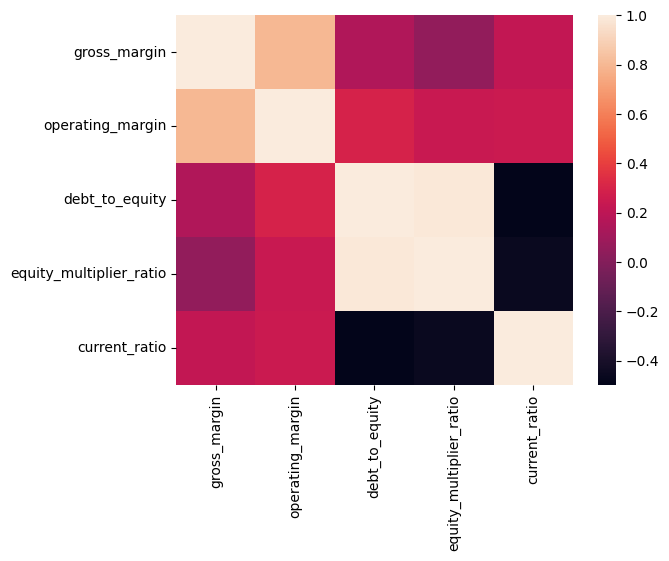

In [62]:
dataset["current_ratio"] = dataset['Total Current Assets'] / dataset['Total Current Liabilities']
dataset["equity_multiplier_ratio"] = dataset["Total Assets"] / dataset["Total Stockholder Equity"]

# Make the correlation matrix
corr_mat = dataset[["gross_margin", "operating_margin", "debt_to_equity",
                             "equity_multiplier_ratio", "current_ratio"]].corr()

# Make heat map
sns.heatmap(data = corr_mat)
plt.show()
plt.close()

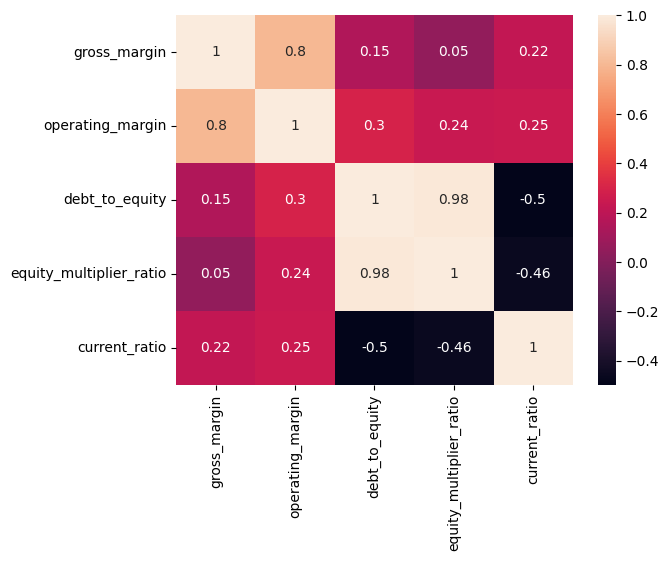

In [63]:
# Make heat map with annotations
sns.heatmap(data = corr_mat, annot = True)
plt.show()
plt.close()

#### **Broad analysis**


To check whether a company is doing well financially, you should check how it compares to its competitors in the same industry.

In this exercise, you'll compute the companies' average debt-to-equity ratio, asset turnover ratio, current ratio, and gross margin over several years.

You'll also compute the average of these ratios in the FMCG, Tech, and Real Estate industries over several years and see how the companies' ratios compare to their industry average.

In [67]:
dataset["asset_turnover"] = dataset["Total Revenue"] / dataset["Total Assets"]

In [68]:
# Compute average by company in each industry
company_avg = dataset.pivot_table(index=["company", "comp_type_y"], values=["debt_to_equity","current_ratio","asset_turnover","gross_margin"]).reset_index()
company_avg

,company,comp_type_y,asset_turnover,current_ratio,debt_to_equity,gross_margin
0,AAPL,tech,0.944048,1.214410,4.305773,0.402850
1,AMT,real_est,0.176656,0.545022,8.599004,0.712812
2,AMZN,tech,1.249091,1.095287,2.461294,0.407094
3,BAM,real_est,0.207890,1.498435,6.490149,0.204583
4,CCI,real_est,0.156701,0.655699,2.830751,0.665978
5,GOOG,tech,0.615640,3.321982,0.386039,0.556437
6,KO,fmcg,0.407865,1.017670,3.414927,0.605645
7,META,tech,0.588448,4.949693,0.261966,0.816401
8,MSFT,tech,0.490208,2.227301,1.472167,0.677526
9,NSRGY,fmcg,0.676720,0.912116,1.529240,0.492077


In [69]:
# Compute average in industry
industry_avg = dataset.pivot_table(index=["comp_type_y"], values=["debt_to_equity","current_ratio","asset_turnover", "gross_margin"]).reset_index()
industry_avg["company"] = "average"
industry_avg

,comp_type_y,asset_turnover,current_ratio,debt_to_equity,gross_margin,company
0,fmcg,0.661312,0.868631,2.997896,0.514396,average
1,real_est,0.234342,1.025647,5.692041,0.534848,average
2,tech,0.777487,2.561735,1.777448,0.572062,average


In [71]:
plot_df = pd.concat([company_avg, industry_avg])

# Melt plot_df to plot it
melt_df = plot_df.melt(id_vars=["company", "comp_type_y"], value_vars =["debt_to_equity"
                  ,"current_ratio","asset_turnover", "gross_margin"], value_name="Ratio" )
melt_df

,company,comp_type_y,variable,Ratio
0,AAPL,tech,debt_to_equity,4.305773
1,AMT,real_est,debt_to_equity,8.599004
2,AMZN,tech,debt_to_equity,2.461294
3,BAM,real_est,debt_to_equity,6.490149
4,CCI,real_est,debt_to_equity,2.830751
...,...,...,...,...
67,UL,fmcg,gross_margin,0.433665
68,WY,real_est,gross_margin,0.276199
69,average,fmcg,gross_margin,0.514396
70,average,real_est,gross_margin,0.534848


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3203: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


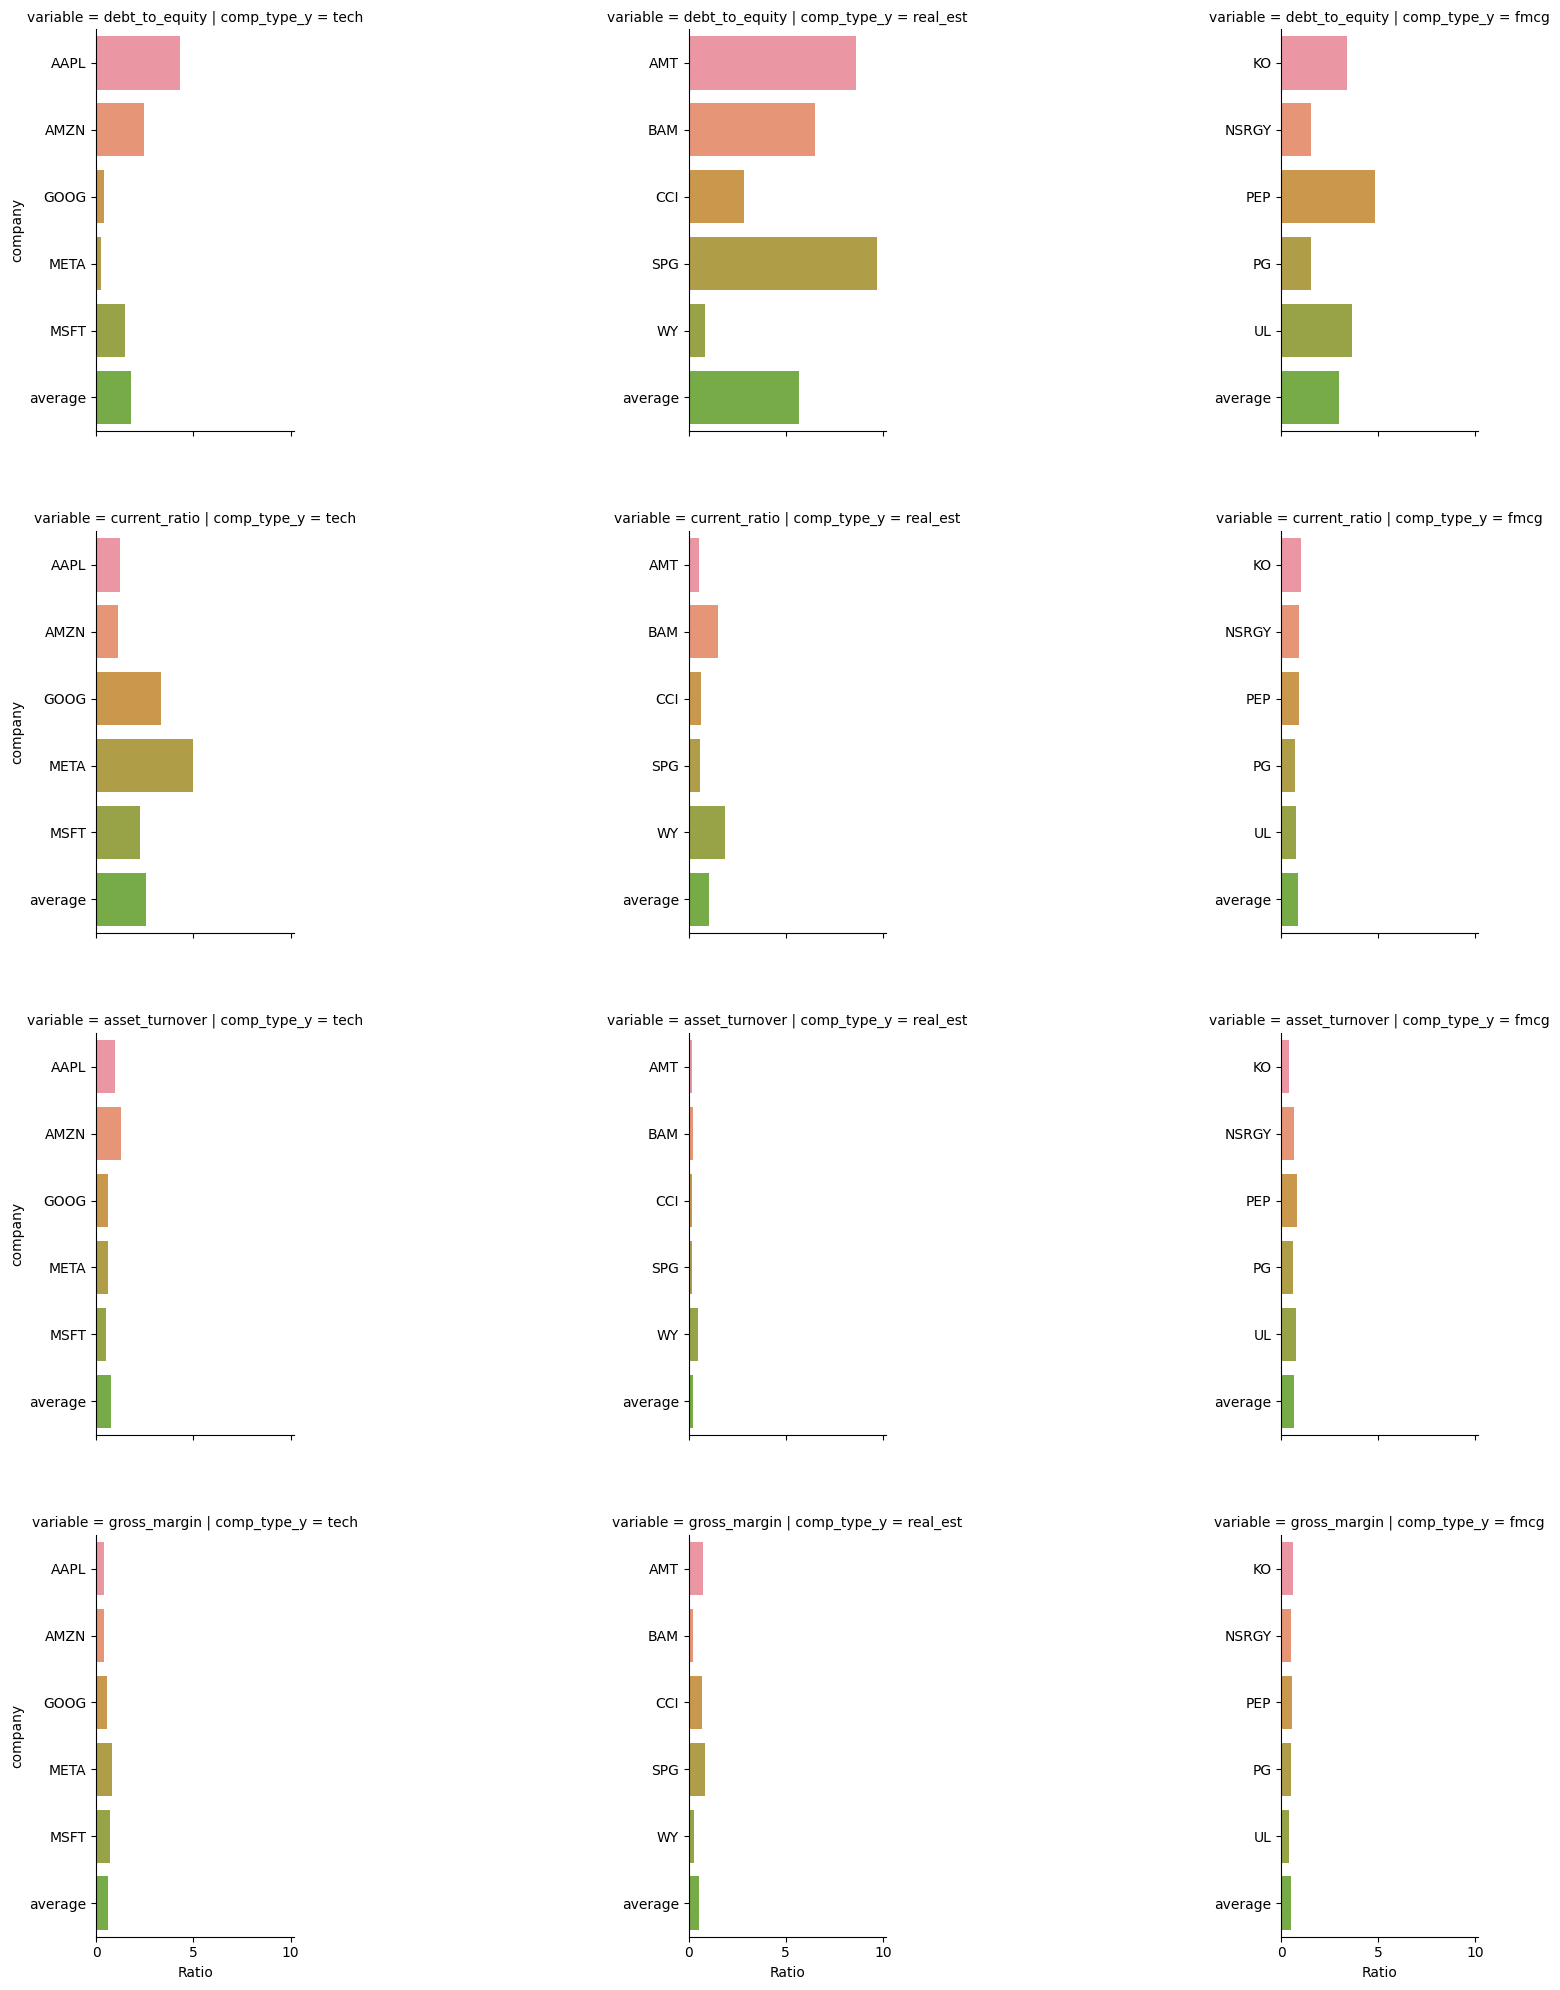

In [73]:
# Plot melt_df
sns.catplot(data=melt_df, x="Ratio", y="company",row="variable", col="comp_type_y", kind="bar", sharey=False)
plt.subplots_adjust(hspace=0.25, wspace=2)
plt.show()
plt.close()